# Описание работы:
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят).

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# загружаем датасет
data_telecom = pd.read_csv('telecom_users.csv', index_col=0)

# в столбце TotalCharges значения представлены в формате str, меняем на float для получения необходимых рассчетов.
data_telecom['TotalCharges'] = [float(0) if i == ' ' else float(i) for i in data_telecom['TotalCharges'] ]

# в столбце 'SeniorCitizen' заменим значения для лучшей читаемости и единообразия данных.
data_telecom['SeniorCitizen'].replace({0:'No', 1:'Yes'}, inplace=True)
data_telecom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,No,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,No,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,No,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [184]:
#Проверяем датасет на пропущенные значения.

data_telecom.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [272]:
# Выведем наиболее часто встречающиеся значения в столбцах.
for column in data_telecom.columns:
    print(column)
    print(data_telecom[column].value_counts().nlargest(5), '\n')

customerID
7010-BRBUU    1
6303-KFWSL    1
5692-ICXLW    1
5561-NWEVX    1
3392-EHMNK    1
Name: customerID, dtype: int64 

gender
Male      3050
Female    2936
Name: gender, dtype: int64 

SeniorCitizen
No     5020
Yes     966
Name: SeniorCitizen, dtype: int64 

Partner
No     3082
Yes    2904
Name: Partner, dtype: int64 

Dependents
No     4195
Yes    1791
Name: Dependents, dtype: int64 

tenure
1     510
72    308
2     194
3     169
4     154
Name: tenure, dtype: int64 

PhoneService
Yes    5396
No      590
Name: PhoneService, dtype: int64 

MultipleLines
No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64 

InternetService
Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64 

OnlineSecurity
No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64 

OnlineBackup
No                     2605
Yes                    2090
No i

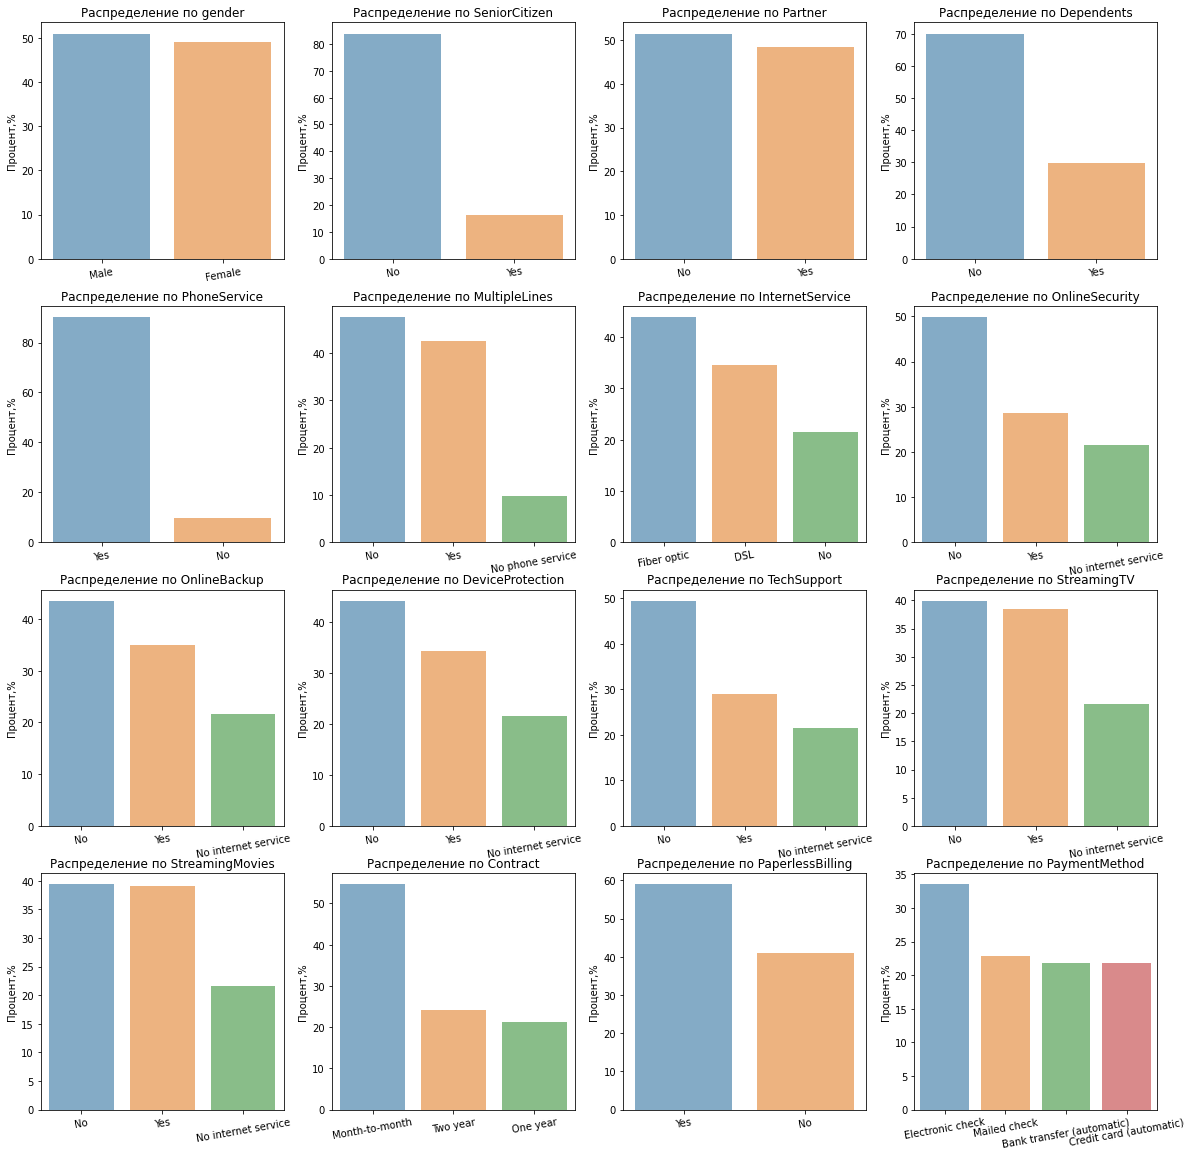

In [413]:
# Графики распределения основных столбцов (object)
# Churn выведем позже
obj_data = data_telecom.loc[:, data_telecom.dtypes=='object'].drop(['customerID','Churn'], axis=1)
fig , axes = plt.subplots(4,4,figsize=(20,20))

for ax, column in zip(axes.ravel(), obj_data.columns):
    data = (obj_data[column].value_counts()/obj_data[column].value_counts().sum()*100).to_frame().reset_index()
    sns.barplot(y=data.columns[1], x='index', data=data, alpha=0.6, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
    ax.set(ylabel='Процент,%', xlabel=None)
    ax.set_title(f'Распределение по {column}')

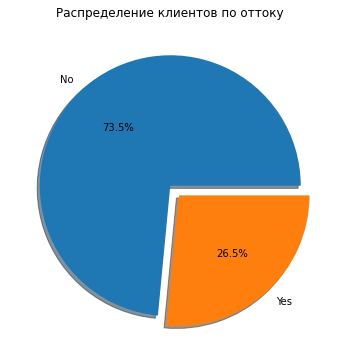

In [412]:
# График распределения по оттоку клиентов
fig, axes = plt.subplots(figsize=(12,6))
data_telecom['Churn'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.ylabel(None)
plt.title('Распределение клиентов по оттоку')
plt.show()

In [411]:
# Cтатистика по суммам оплаты и времени(в месяцах) пользования услугами компании.

data_telecom.loc[:, data_telecom.dtypes!='object'].describe() 

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


C:\Users\c1a1t\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\c1a1t\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\c1a1t\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

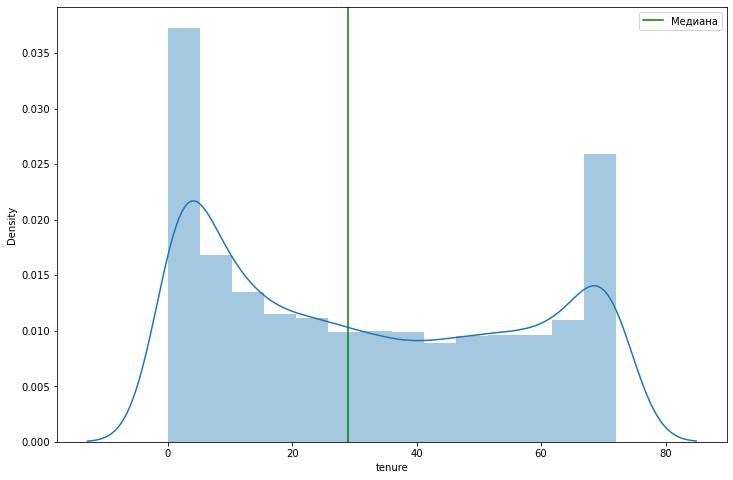

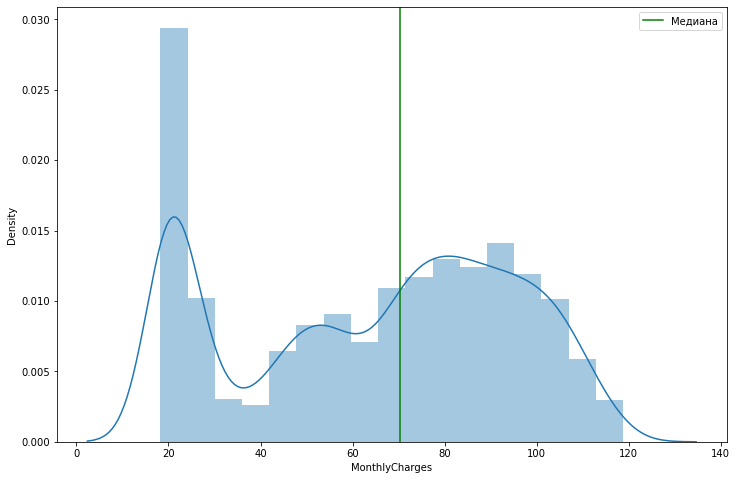

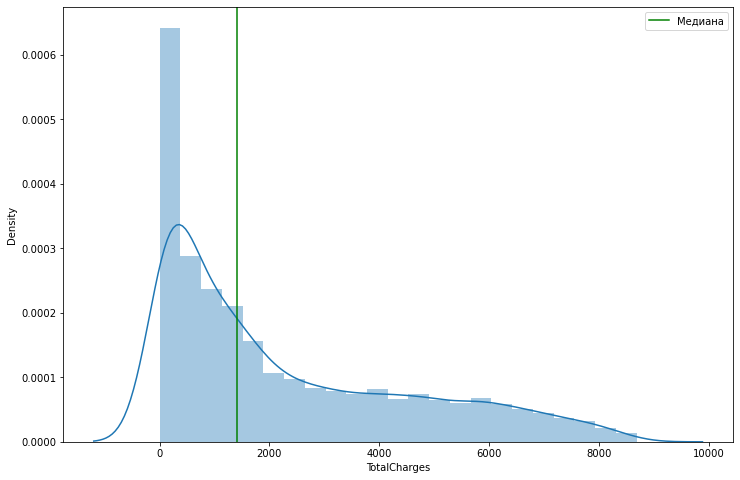

In [416]:
# Распределение данных этих столбцов
list_for_dist = data_telecom.loc[:, data_telecom.dtypes!='object'].columns


for column in (list_for_dist):
    fig, axes = plt.subplots(figsize=(12, 8))
    sns.distplot(data_telecom[column])
    axes.axvline(data_telecom[column].median(), c='g', label='Медиана')
    axes.legend()

**Выводы:**
1. В этом датасете содержатся данные о 5986 клиентах компании.
2. Из них 3050 мужчины. Женьщин незначительно меньше.
3. 1291 человек не пользуются услугами интернет провайдера.
4. У 590 человек не подключена услуга связи.
5. Максимальный срок пользования услугами компании - 72 месяца. Это значит, что данные брались за 6 лет.
6. В среднем пользователь платит 64.8 доллоров в мес. или 2294.2 доллоров в год.
7. Отток клиентов за 6 лет составил 1587 человек (26,5%)
8. Среди пользователей мало пенсионеров.
9. Пользователи предпочитают помесячную оплату.
10. На графике TotalCharges явное смещение к 0.
11. На графике MonthlyCharges явно выражены 2 кластера значений. Распределение идет вокруг 20 и 70 доллоров в мес.
12. На графике Tenure тоже явно видно 2 пика - люди, которые несколько лет пользуются услугами компании и совсем новые пользователи.



# 2. Исследование зависимостей и формулирование гипотез

**2.1 Влияние признаков на отток пользователай**

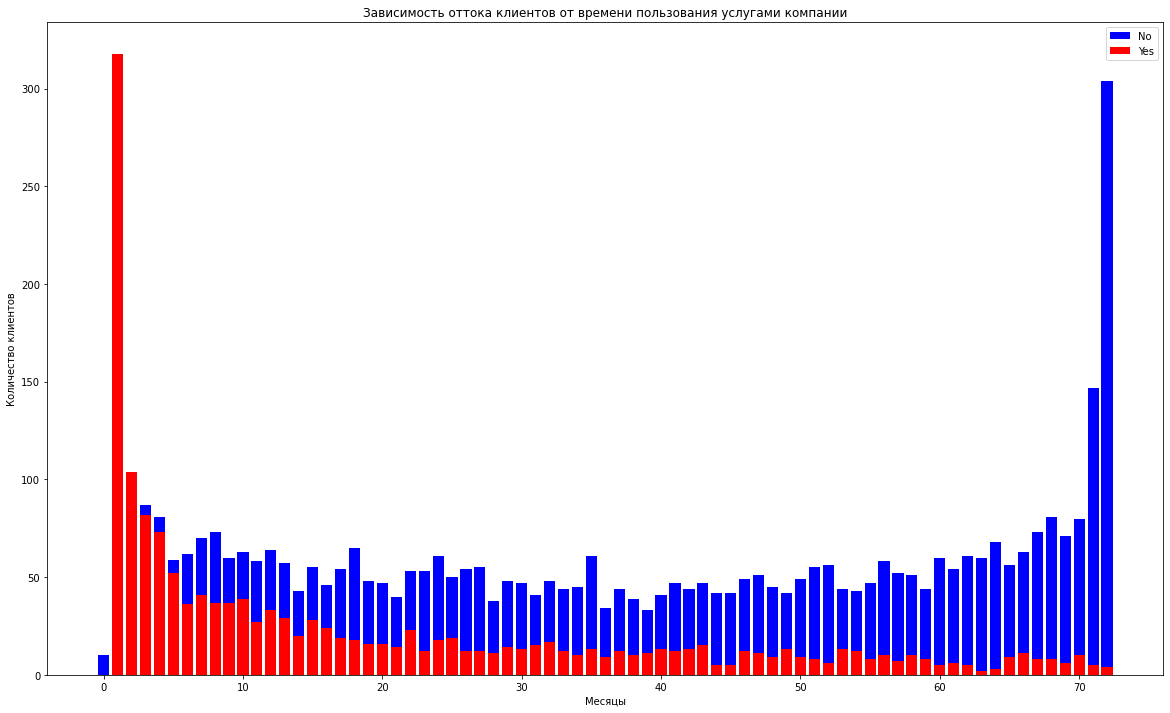

In [590]:
# Для начала сравним время пользования услугами компании ушедших клиентов с оставшимися.

data_no = data_telecom[data_telecom['Churn'] == 'No'].groupby('tenure')['customerID'].count().reset_index()
data_yes = data_telecom[data_telecom['Churn'] == 'Yes'].groupby('tenure')['customerID'].count().reset_index()
fig, axis = plt.subplots(figsize=(20,12))
plt.bar( data_no['tenure'], data_no['customerID'], color='b', label='No')
plt.bar( data_yes['tenure'], data_yes['customerID'], color='r', label='Yes')
plt.title('Зависимость оттока клиентов от времени пользования услугами компании')
plt.xlabel('Месяцы')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

Мы явно видим, что в основном клиенты уходят в течении первых 10 месяцев.

In [625]:
# Далее построим график отражающий распределение оставшихся и ушедших клиентов, выдилив конкретные услуги компании.
# Подготовим датасет для дальнейших операций заменив значения на 0 и 1.

bin_df = data_telecom[:].replace({'No':0, 'Yes':1, 'No phone service':0, 'Fiber optic':1, 'DSL':1,'No internet service':0})

# Уберем лишние столбцы
bin_df = bin_df.drop(['SeniorCitizen','Partner','Dependents','MonthlyCharges',
                      'TotalCharges','customerID','gender','Contract','PaymentMethod'], axis=1)

# Разобьем подготовленный датасет на 3 части, содержащих оставшихся клиентов и ушедших, а так же ушедших за 10 первых месяцев
bin_df_no = bin_df[bin_df['Churn'] == 0].drop(['tenure','Churn'], axis=1)
bin_df_yes_10 = bin_df[(bin_df['Churn'] == 1) & (bin_df['tenure'] < 11)].drop(['tenure','Churn'], axis=1)
bin_df_yes = bin_df[bin_df['Churn'] == 1].drop(['tenure','Churn'], axis=1)


# Посчитаем количество человек, пользующихся услугами 
no_list = [bin_df_no[i].sum() for i in bin_df_no]
yes_list_10 = [bin_df_yes_10[i].sum() for i in bin_df_yes_10]
yes_list = [bin_df_yes[i].sum() for i in bin_df_yes]
columns = bin_df_no.columns

# Из полученных данных формируем новый датафрейм
serv_df= pd.DataFrame(data={'status': columns, 'users_out':yes_list, 'users_out_10':yes_list_10, 'users_in':no_list})
serv_df.head(5)

,status,users_out,users_out_10,users_in
0,PhoneService,1438,733,3958
1,MultipleLines,723,236,1825
2,InternetService,1488,745,3207
3,OnlineSecurity,246,58,1467
4,OnlineBackup,450,130,1640


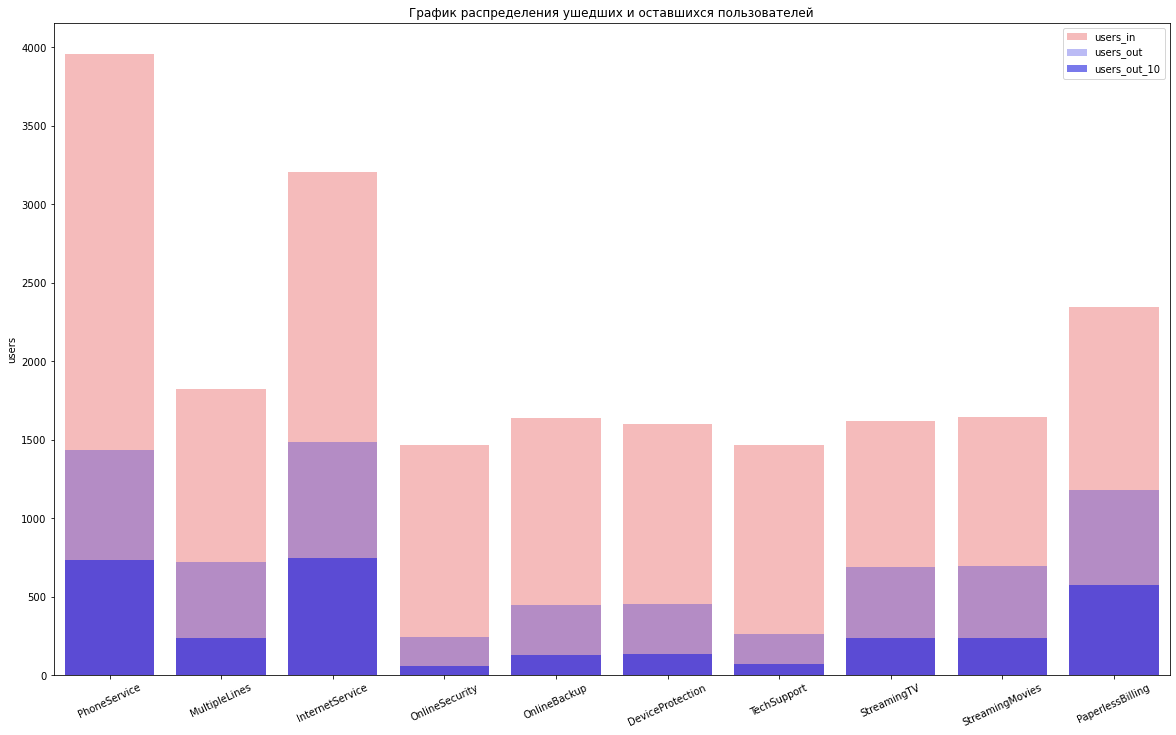

In [635]:
# Построим график

fig, axis = plt.subplots(figsize=(20,12))
sns.barplot(x=serv_df['status'], y=serv_df['users_in'], color='r',alpha=.3, label='users_in')
sns.barplot(x=serv_df['status'], y=serv_df['users_out'], color='b', alpha=.3, label='users_out')
sns.barplot(x=serv_df['status'], y=serv_df['users_out_10'], color='b', alpha=.6, label='users_out_10')
axis.set(ylabel='users', xlabel=None)
plt.xticks(rotation=25)
plt.title("График распределения ушедших и оставшихся пользователей")
plt.legend()
plt.show()

По графиику видно что, основная масса ушедших людей пользовалась интернетом и телефонной связью а так же безбумажным биллингом. 
Стоит обратить внимание на кочество предоставления этих услуг.
Так же нужно отметить, что половина пользователей данными услугами расторгла договор в первые 10 месяцев.

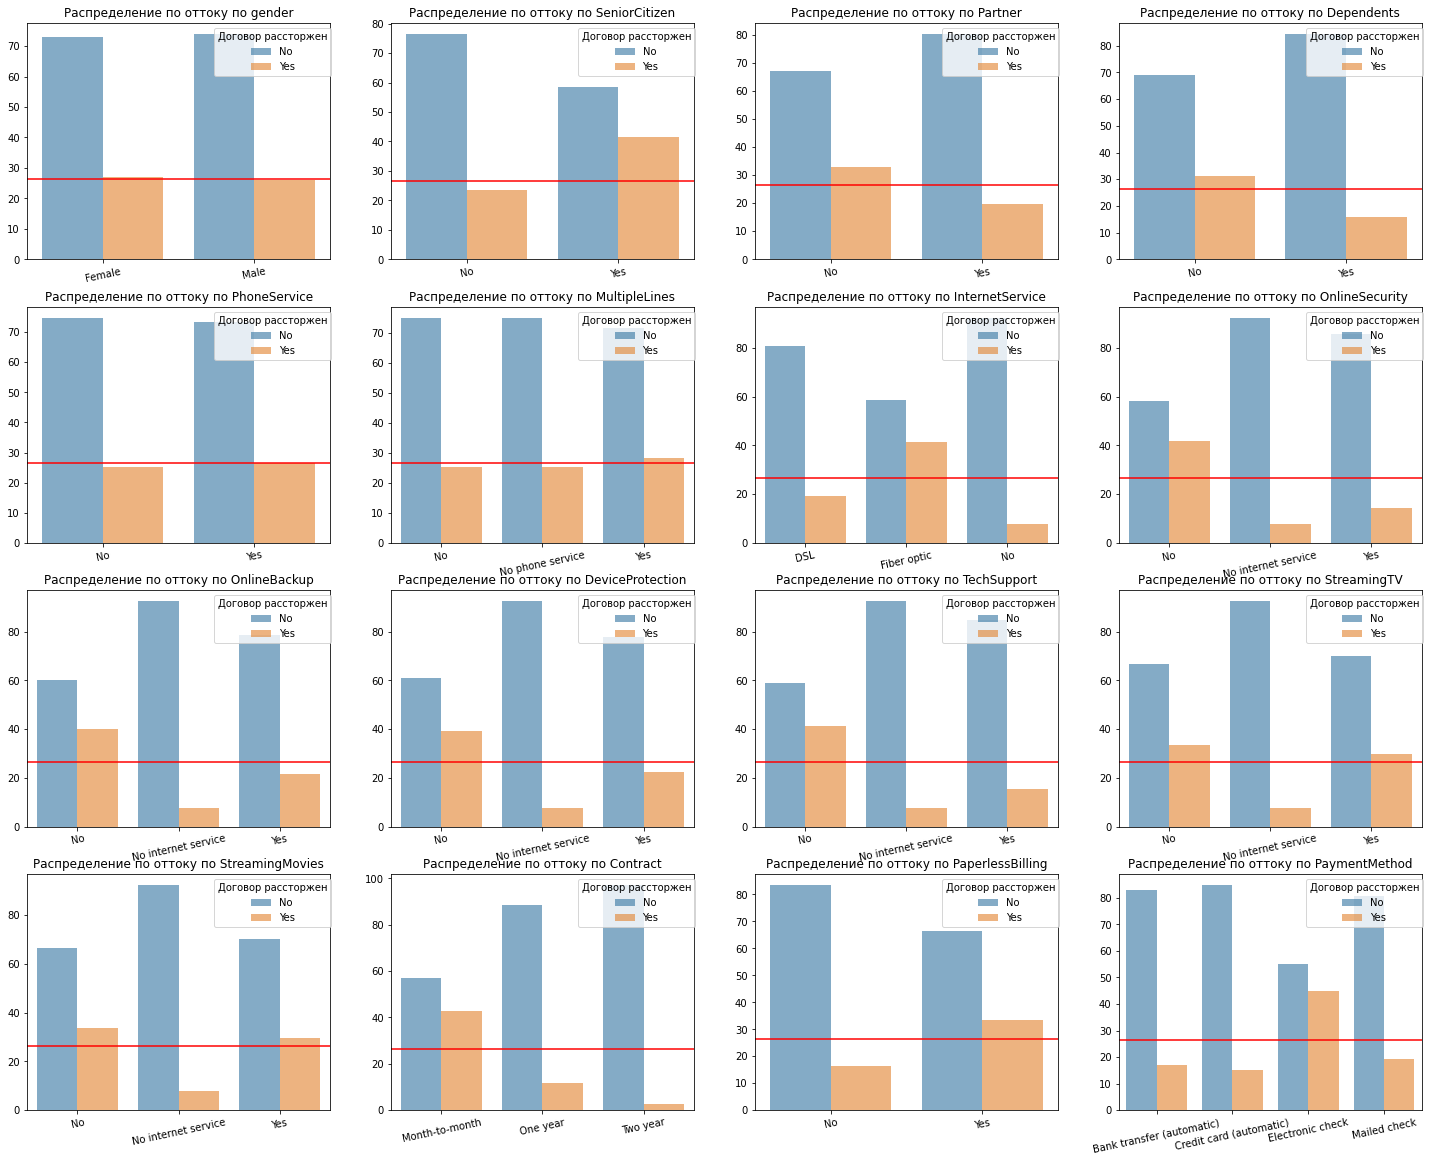

In [623]:
# Построим отдельные графики по каждой категории, вдруг что упустили.
main_columns = obj_data.columns

fig , axes = plt.subplots(4,4,figsize=(25,20))

for ax, column in zip(axes.ravel(), main_columns):
    data = data_telecom\
    .groupby(['Churn', column])[column].count()\
    .groupby(column).apply(lambda x: 100 * x / x.sum())\
    .to_frame().stack().reset_index()
    
    sns.barplot(x=column, y=0, hue='Churn', data=data, ax=ax, alpha=0.6)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=12)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение по оттоку по {column}')
    ax.legend(title='Договор рассторжен', loc=2, bbox_to_anchor=(.6,1), fontsize=10)
    
    # отразим на графике прямую, символизирующую пропорцию между глобальным churn/not churn
    ax.axhline(26.5, c='r')
    

**Вывод:**
- Стоит начать с того, что нет причин для того, чтобы мужчины и женщины поразному относились к услугам связи данной компании.
- Клиенты с оптоволоконным подключением к сети интернет, чаще других рассторгают договоры. Может быть качество по данному типу связи у конкурентов лучше? Ну или тарифы выгоднее. Кстати, клиентов фирмы, не пользующихся услугами компании как интернет-провайдера, похоже всё устраивает.
- Клиенты, не пользующиеся безбумажным биллингом, реже рассторгают контракт, в отличие от тех, кто предпочел безбумажную форму оплаты. Возможно, стоит посмотреть на сложности в процедуре безбумажной оплаты, клиентам явно это не нравится.
- А вот и конкретика предыдущего пункта. Клиенты, пользующиеся онлайн-оплатой, чаще рассторгают договор с фирмой. Возможно в этом и есть загвоздка.

Итак можно предполагать, что уйдут в первую очередь клиенты SeniorCitizen, InternetService (Fiber optic),
Contract (month-to-month), PaymentMethod (electronic check).

**2.2 Влияние времени пребывания клиентом в компании на размер месячного чека**

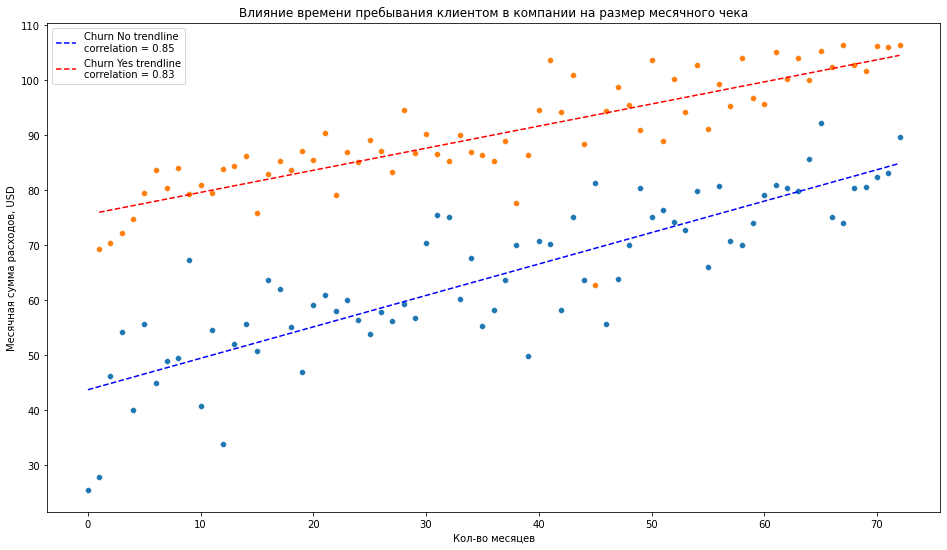

In [651]:
# Рассмотрим влияние времени пребывания клиентом компании на размер месячного чека

# создадим для дальнейшего удобства функцию по определнию линии тренда
def plot_trendline(x, y, degree, color, name):
    trend = np.polyfit(x, y, degree)
    trendline = np.poly1d(trend)
    # вычислим коэффициент корреляции
    coef_corr = x.corr(y)
    return plt.plot(x, trendline(x), f'{color}--', label=f'{name} trendline\ncorrelation = {coef_corr:.2}')


# теперь уже сгруппируем клиентов по месяцам и оттоку и найдем медиану каждой группы
df_by_tenure_churn = data_telecom[['Churn', 'tenure', 'MonthlyCharges']].groupby(['Churn', 'tenure']).median().reset_index()
x_0 = df_by_tenure_churn[df_by_tenure_churn['Churn'] == 'No']['tenure']
y_0 = df_by_tenure_churn[df_by_tenure_churn['Churn'] == 'No']['MonthlyCharges']
x_1 = df_by_tenure_churn[df_by_tenure_churn['Churn'] == 'Yes']['tenure']
y_1 = df_by_tenure_churn[df_by_tenure_churn['Churn'] == 'Yes']['MonthlyCharges']

# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)

# определим линию тренда для большей показательности
plot_trendline(x_0, y_0, 1, 'b', 'Churn No')
plot_trendline(x_1, y_1, 1, 'r', 'Churn Yes')
plt.title('Влияние времени пребывания клиентом в компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

**Вывод:**
- На лицо явная кластеризация по медианной месячной сумме чека. Люди, отказавшиеся от услуг компании, тратили явно больше, чем те, кто остался её клиентом.

**2.3 Корреляционный анализ**

In [5]:
# Подготовим данные
bin_data = data_telecom[:]

# Создадим новые колонки с результатами Yes-N0 для колонок с множественными значениями
bin_data['Fiber optic'] = ['Yes' if i == 'Fiber optic' else 'No' for i in bin_data['InternetService']]
bin_data['DSL'] = ['Yes' if i == 'DSL' else 'No' for i in bin_data['InternetService']]
bin_data['Cont. Two year'] = ['Yes' if i == 'Two year' else 'No' for i in bin_data['Contract']]
bin_data['Cont. Month-to-month'] = ['Yes' if i == 'Month-to-month' else 'No' for i in bin_data['Contract']]
bin_data['Cont. One year'] = ['Yes' if i == 'One year' else 'No' for i in bin_data['Contract']]
bin_data['PM. Credit card (automatic)'] = ['Yes' if i == 'Credit card (automatic)' else 'No' for i in bin_data['PaymentMethod']]
bin_data['PM. Bank transfer (automatic)'] = ['Yes' if i == 'Bank transfer (automatic)' else 'No' for i in bin_data['PaymentMethod']]
bin_data['PM. Electronic check'] = ['Yes' if i == 'Electronic check' else 'No' for i in bin_data['PaymentMethod']]
bin_data['PM. Mailed check'] = ['Yes' if i == 'Mailed check' else 'No' for i in bin_data['PaymentMethod']]

# А так же понизим размерность tenure пересчитав эту величину в годах
bin_data['tenure (years)'] = [i/12 for i in bin_data['tenure']]

bin_data = bin_data.replace({'Male':1, 'Female':0, 'No':0, 'Yes':1, 'No phone service':0,
                             'Fiber optic':1,'DSL':1,'No internet service':0})

bin_data = bin_data.drop(['tenure','Contract', 'PaymentMethod'], axis=1)
corr_1 = bin_data.drop(['MonthlyCharges','TotalCharges','customerID'], axis=1)
corr_1.head(5)

C:\Users\c1a1t\AppData\Local\Temp/ipykernel_10320/2247481200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['Fiber optic'] = ['Yes' if i == 'Fiber optic' else 'No' for i in bin_data['InternetService']]
C:\Users\c1a1t\AppData\Local\Temp/ipykernel_10320/2247481200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['DSL'] = ['Yes' if i == 'DSL' else 'No' for i in bin_data['InternetService']]
C:\Users\c1a1t\AppData\Local\Temp/ipykernel_10320/2247481200.py:7: SettingWithCopyWarning: 
A va

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Fiber optic,DSL,Cont. Two year,Cont. Month-to-month,Cont. One year,PM. Credit card (automatic),PM. Bank transfer (automatic),PM. Electronic check,PM. Mailed check,tenure (years)
1869,1,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,6.000000
4528,0,0,0,0,1,0,1,0,1,1,...,1,0,0,1,0,1,0,0,0,3.666667
6344,0,1,1,0,1,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,3.166667
6739,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0.333333
432,1,0,0,0,1,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0.166667


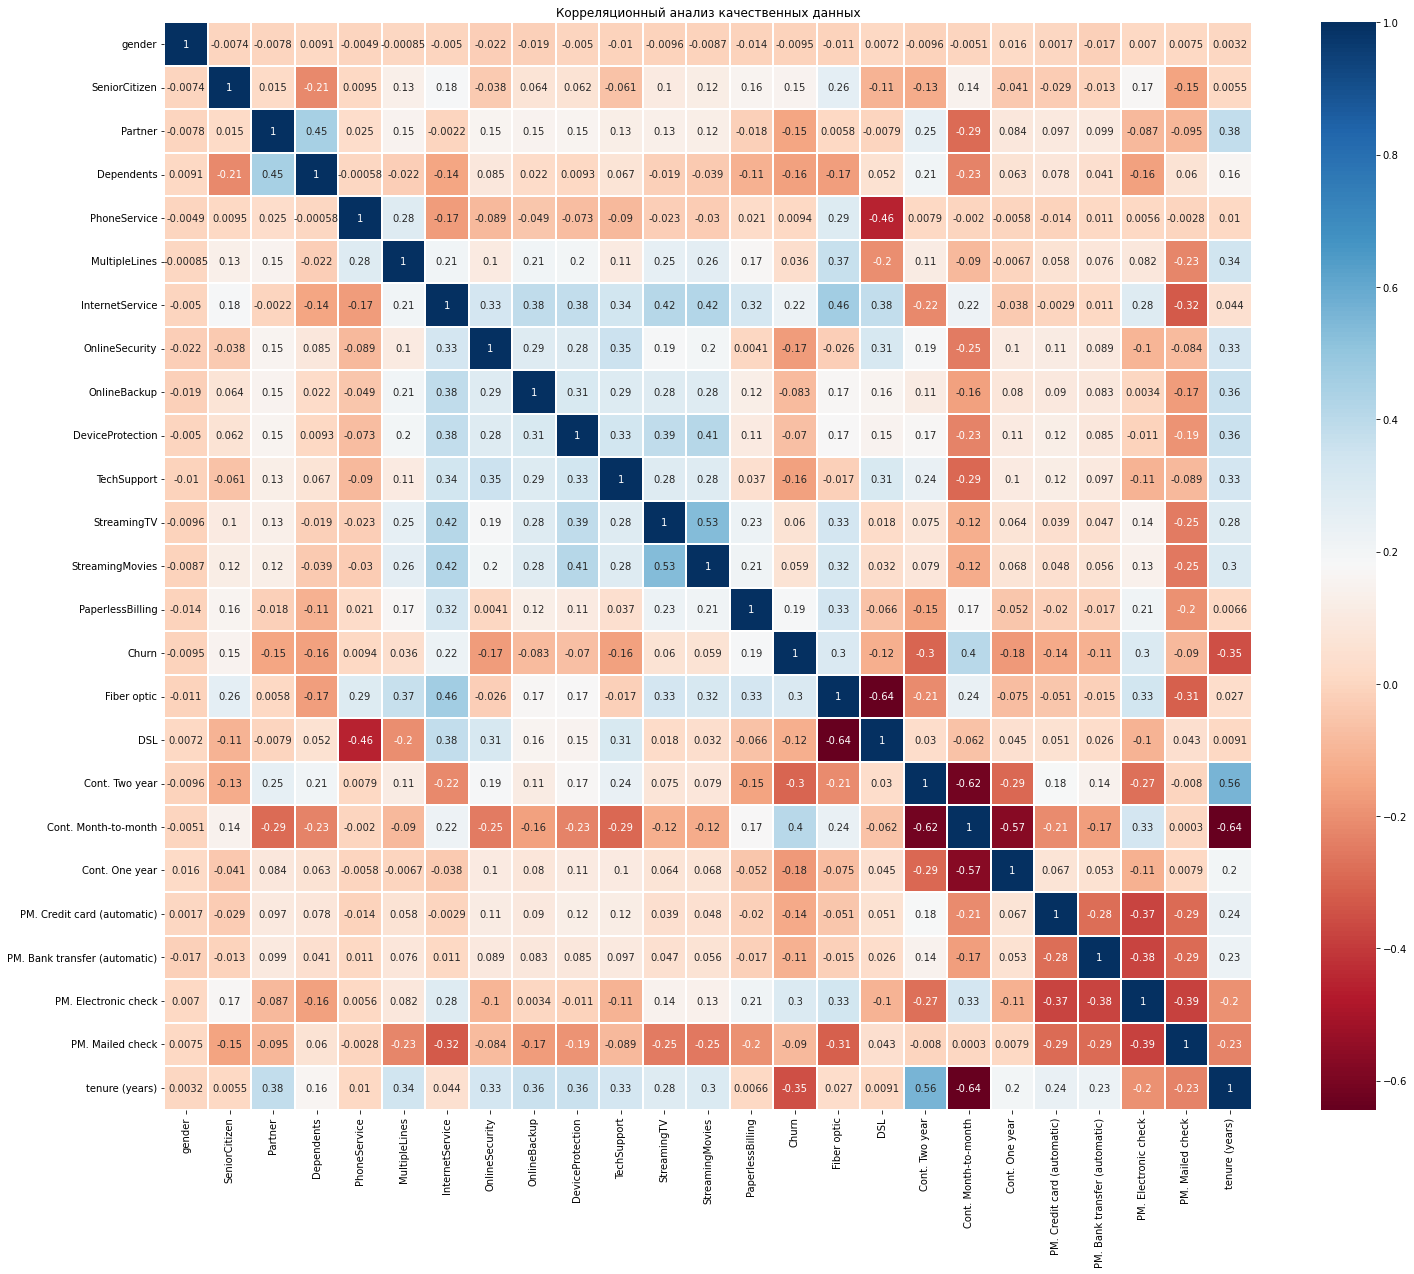

In [704]:
# строим граффик

colormap = plt.cm.RdBu
plt.figure(figsize=(25,20))
sns.heatmap(corr_1.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Корреляционный анализ качественных данных')
plt.show()

- Наблюдается умеренная корреляция между Churn, Fiber optic, Month-to-month, Electronic check.
- Слабая корреляция между Churn, InternetService, PaperlessBilling, SeniorCitizen.

In [697]:
# Теперь рассмотрим количественные данные
# сформируем датасет

corr_2 = bin_data[['MonthlyCharges','TotalCharges','tenure (years)','Churn']]
corr_2

,MonthlyCharges,TotalCharges,tenure (years),Churn
1869,24.10,1734.65,6.000000,0
4528,88.15,3973.20,3.666667,0
6344,74.95,2869.85,3.166667,1
6739,55.90,238.50,0.333333,0
432,53.45,119.50,0.166667,0
...,...,...,...,...
3772,95.00,95.00,0.083333,1
5191,91.10,2198.30,1.916667,0
5226,21.15,306.05,1.000000,0
5390,99.45,1200.15,1.000000,1


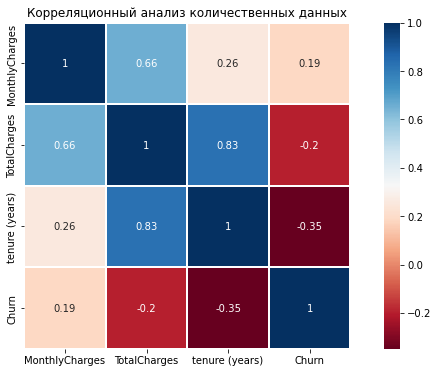

In [695]:
# и построим график

colormap = plt.cm.RdBu
plt.figure(figsize=(12,6))
sns.heatmap(corr_2.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Корреляционный анализ количественных данных')
plt.show()

Наблюдается высокая зависимость между TotalCharges и tenure .

### Основые рекоммендации аналитического анализа:
1. Самый большой отток среди клиентов, пользующихся услугами несколько месяцев. Посколько нет временных данных, можно предположить, что ожидания не оправдались - возможные причины: отсутствие привычных/ожидаемых сервисов, не соответствие реальных параметров и рекламируемых, либо технические проблемы (см. ниже).
2. Стремиться перевести клиента на годичный контракт (или 2-х годичный) и стимулировать переход на автоматические формы оплаты.
3. Для удовлетворения потребностей мобильных клиентов, расширять географию (и/или договариваться с другими местными провайдерами), тем самым подталкивая клиентов заключать длительный контракт (отсутствием штрафов при расторжении)
4. Уделять больше внимания и активнее стимулировать тех клиентов, которые оплачивают счета электронными чеками, для укрепления доверия, посредством разъяснения работы сервисов и преимуществ перехода на контракт. Дополнительно проверить, есть ли технические проблемы с оплатой электронными чеками.
5. Изучить технические проблемы и/или конкурентноспособность высокоскоростного интернета (fiber optic) и Streaming сервисов (Streaming services не являются конкурентным преимуществом или фактором удержания клиента).
6. Относительно много клиентов остаются довольными услугами OnlineSecurity, TechSupport (вероятно сильные стороны провайдера) - активнее продвигать преимущества этих сервисов. Тот же вывод можно перефразировать: не использование таких сервисов, как **OnlineSecurity, TechSupport, DeviceProtection, OnlineBackup** говорит о том, что клиент не склонен к долгосрочным отношениям с провайдером.
7. PaperlessBilling связан с оттоком (возможно, просто совпадение, вследствие одновременного запуска не самых удачных изменений и PaperlessBilling опции, либо неинформативность/непрезентабильность самого счета) - вероятно также, что это черта портрета пользователя высокоскоростного интернета, где наблюдается значительный отток.

# 3. Построение моделей для прогнозирования оттока

Исходя из входных данных перед нами стоит задача бинарной классификации для решения которой мы используем ряд проверенных классификаторов, посмотрим их метрики. В данном случае наc интересуют roc auc score и recall т.к. нам важно точнее предсказать тех, кто ушел из компании. Также применим GridSearchCV для подбора оптимальных параметров а так же XGBClassifier.

Из ранее подготовленного датасета исключим 
- customerID - он нам никак не поможет в предсказании,
- TotalCharges - слишком много различных значений, тем более он сильно коррелирует с tenure,
- MonthlyCharges - разделим на 2 группы с чеком до 65 usd и больше.

In [30]:
# необходимые импорты
from sklearn.model_selection import (GridSearchCV, train_test_split, StratifiedKFold)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB
from sklearn.linear_model import LogisticRegression, ElasticNetCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score

In [6]:
# Подготовка датасета

#ml_df = bin_data[['Fiber optic','Cont. Month-to-month', 'PM. Electronic check','InternetService', 'PaperlessBilling',
#                  'SeniorCitizen','MonthlyCharges','tenure (years)','Churn']]

ml_df = bin_data.drop(['customerID', 'TotalCharges'],axis=1)  
ml_df['MonthlyCharges'] = [ 0 if i < 65 else 1 for i in ml_df['MonthlyCharges']] # разделение на 2 группы
y = ml_df['Churn'] # задаем целевую переменную
X = ml_df.drop(['Churn'], axis = 1) # отделяем целевую переменную от признаков

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=17) # разделяем данные на выборки

In [31]:
# составим список классификаторов
base_classifiers = [ExtraTreeClassifier, DecisionTreeClassifier, SVC, NuSVC, LinearSVC, MLPClassifier,
                    KNeighborsClassifier, NearestCentroid, BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB,
                    ComplementNB, LogisticRegression, RidgeClassifierCV, LinearDiscriminantAnalysis,
                    GradientBoostingClassifier, RandomForestClassifier]

# результаты "прогона" базовых классификаторов
classifier_names, recall_scores, roc_auc_scores, accuracy= [], [], [], []

for classifier in base_classifiers:
    # "завернём" в оболочку try-except алгоритмы и зададим параметр random_state=0 для репрезентативности результатов
    try:
        estimator = classifier(random_state=17)
    except TypeError:
        estimator = classifier()
    # обучим модель
    model = estimator.fit(x_train, y_train)
    # получим предсказанные значения для тестовых фич
    y_pred = model.predict(x_valid)
    # посчитаем метрики и занесём результаты в соответствующие списки
    classifier_names.append(classifier.__name__)
    roc_auc_scores.append(roc_auc_score(y_valid, y_pred))
    recall_scores.append(recall_score(y_valid, y_pred))  
    accuracy.append(accuracy_score(y_valid, y_pred))
    
# создадим датафрейм с результатами
base_classifiers_df = pd.DataFrame(data=zip(classifier_names, roc_auc_scores, recall_scores, accuracy),
                                   columns=['classifier', 'roc_auc', 'recall', 'accuracy'])
# отсортируем датафрейм по roc-auc метрике в порядке убывания, а также проиндексируем по порядку
base_classifiers_df = base_classifiers_df.sort_values(['roc_auc', 'recall'], ascending=False).reset_index(drop=True)
base_classifiers_df

C:\Users\c1a1t\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\c1a1t\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,classifier,roc_auc,recall,accuracy
0,ComplementNB,0.742007,0.771552,0.727728
1,GaussianNB,0.738425,0.730603,0.742205
2,CategoricalNB,0.737435,0.674569,0.767817
3,MultinomialNB,0.732775,0.631466,0.781737
4,BernoulliNB,0.725206,0.650862,0.761136
5,LogisticRegression,0.705088,0.510776,0.798998
6,LinearSVC,0.702932,0.506466,0.797884
7,LinearDiscriminantAnalysis,0.700861,0.515086,0.790646
8,GradientBoostingClassifier,0.697460,0.482759,0.801225
9,RidgeClassifierCV,0.697412,0.484914,0.800111


А теперь применим PCA преобразование и MinMaxScaler т.к. некоторые наивные байесовские классификаторы ругаются на отрицательные значения и посмотрим на результат.

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD

transed_model = PCA(n_components=2).fit(x_train)
x_train_svd = transed_model.transform(x_train)
x_train_svd_restored = transed_model.inverse_transform(x_train_svd)

scaler = MinMaxScaler()
x_train_mm = scaler.fit_transform(x_train_svd_restored  )

In [149]:
# составим список классификаторов
base_classifiers = [ExtraTreeClassifier, DecisionTreeClassifier, SVC, NuSVC, LinearSVC, MLPClassifier,
                    KNeighborsClassifier, NearestCentroid, BernoulliNB, GaussianNB, MultinomialNB,
                    ComplementNB, LogisticRegressionCV, RidgeClassifierCV, LinearDiscriminantAnalysis,
                    GradientBoostingClassifier, RandomForestClassifier]

# результаты "прогона" базовых классификаторов
classifier_names, recall_scores, roc_auc_scores, accuracy= [], [], [], []

for classifier in base_classifiers:
    # "завернём" в оболочку try-except алгоритмы и зададим параметр random_state=0 для репрезентативности результатов
    try:
        estimator = classifier(random_state=17)
    except TypeError:
        estimator = classifier()
    # обучим модель
    model = estimator.fit(x_train_mm, y_train)
    # получим предсказанные значения для тестовых фич
    y_pred = model.predict(x_valid)
    # посчитаем метрики и занесём результаты в соответствующие списки
    classifier_names.append(classifier.__name__)
    roc_auc_scores.append(roc_auc_score(y_valid, y_pred))
    recall_scores.append(recall_score(y_valid, y_pred))  
    accuracy.append(accuracy_score(y_valid, y_pred))
    
# создадим датафрейм с результатами
base_classifiers_df = pd.DataFrame(data=zip(classifier_names, roc_auc_scores, recall_scores, accuracy),
                                   columns=['classifier', 'roc_auc', 'recall', 'accuracy'])
# отсортируем датафрейм по roc-auc метрике в порядке убывания, а также проиндексируем по порядку
base_classifiers_df = base_classifiers_df.sort_values(['roc_auc', 'recall','accuracy'], ascending=False).reset_index(drop=True)
base_classifiers_df

,classifier,roc_auc,recall,accuracy
0,NearestCentroid,0.729937,0.724138,0.732739
1,ComplementNB,0.720397,0.681034,0.739421
2,LinearDiscriminantAnalysis,0.700884,0.547414,0.775056
3,MultinomialNB,0.694493,0.497845,0.789532
4,LogisticRegressionCV,0.689154,0.484914,0.787862
5,LinearSVC,0.685109,0.497845,0.775612
6,KNeighborsClassifier,0.679200,0.493534,0.768931
7,RidgeClassifierCV,0.676514,0.446121,0.787862
8,MLPClassifier,0.674430,0.471983,0.772272
9,RandomForestClassifier,0.658172,0.877155,0.552339


Мы получили значительное повышение Recall среди некоторых моделей но пожертвовали стабильностью других.

### Stacking

Для дальнейших операций используем модели с лучшими метриками Recall, а именно GradientBoostingClassifier, RandomForestClassifier и NearestCentroid.

In [66]:
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

nc_params = {'shrink_threshold': range(0, 2)}


skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

models = [[GradientBoostingClassifier(random_state=17), gbc_params],
          [RandomForestClassifier(random_state=17), rfc_params],
          [NearestCentroid(), nc_params]]

grid_cv = None 
predictions = []   # создаем список, в который будем вносить лучшие модели и их предсказания

for i, (model, params) in enumerate(models):
    grid_cv = GridSearchCV(model, param_grid=params, cv=skf).fit(x_train_mm, y_train)# определяем GridSearchCV и обучаем модель
    best_estimator = grid_cv.best_estimator_   # определяем обученную на лучших параметрах модель
    predictions.append([best_estimator, best_estimator.predict(x_valid)])   # заполняем список 
    
    print(best_estimator)
    print('best parameters:',grid_cv.best_params_,'\n') # лучшие параметры модели

GradientBoostingClassifier(random_state=17)
best parameters: {'learning_rate': 0.1} 

RandomForestClassifier(min_samples_leaf=4, n_estimators=40, random_state=17)
best parameters: {'min_samples_leaf': 4, 'n_estimators': 40} 

NearestCentroid(shrink_threshold=0)
best parameters: {'shrink_threshold': 0} 



In [88]:
for (model, predict) in predictions:  # метрика качества
    print(model)
    print(f'roc_auc: {roc_auc_score(y_valid, predict)}')
    print(f'recall: {recall_score(y_valid, predict)}')
    print(f'accuracy_score: {accuracy_score(y_valid, predict)}\n')

GradientBoostingClassifier(random_state=17)
roc_auc: 0.5932678368023196
recall: 0.8922413793103449
accuracy_score: 0.4487750556792873

RandomForestClassifier(min_samples_leaf=4, n_estimators=40, random_state=17)
roc_auc: 0.6562694159676918
recall: 0.9116379310344828
accuracy_score: 0.5328507795100222

NearestCentroid(shrink_threshold=0)
roc_auc: 0.7299368333851092
recall: 0.7241379310344828
accuracy_score: 0.732739420935412



In [ ]:
# Подберем лучшие параметры на основе предсказаний выбранных моделей.

xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

meta_mtrx = np.empty(( y_valid.shape[0], len(models))) # определяем матрицу

for i, (model, predict) in enumerate(predictions):
    meta_mtrx[:,i] = predict
    
xgb = XGBClassifier(random_state=17, cv=5) # настройка мета алгаритма
grid_xgb = GridSearchCV(xgb, param_grid=xgb_params, cv=skf)
model_xgb = grid_xgb.fit(meta_mtrx, y_valid)
model_xgb.best_params_   # выводим параметры

In [102]:
from sklearn.model_selection import cross_val_predict


best_models = [GradientBoostingClassifier(random_state=17), # лучшие модели с лучшими параметрами
               RandomForestClassifier(min_samples_leaf=4, n_estimators=40, random_state=17),
               NearestCentroid(shrink_threshold=0)]

meta_mtrx_bm = np.empty((x_train_mm.shape[0], len(best_models))) # определяем матрицу
fit_models = [] # пустой список в который будем добавлять обученные модели

for i , best_model in enumerate(best_models): #заполняем матрицу предсказаниями cross_val_predict
    meta_mtrx_bm[:, i] = cross_val_predict(best_model, x_train_mm, y_train, cv=5, method='predict')
    fit_model = best_model.fit(x_train_mm, y_train) # обучаем модели
    fit_models.append(fit_model) # добавляем в список
    
meta_alg = XGBClassifier(eta=0.9,    # мета алгоритм с лучшими параметрами
                         min_child_weight=2,
                         n_estimators=50,
                         subsample=0.30000000000000004,
                         cv=5,
                         random_state=42)

model_meta = meta_alg.fit(meta_mtrx_bm, y_train) # обучаем алгаритм
meta_mtrx_test = np.empty((x_valid.shape[0], len(best_models))) 

for n, model in enumerate(fit_models):
    meta_mtrx_test[:, n] = model.predict(x_valid) # заполняем матрицу предсказаниями обученных моделей
            
meta_predict = model_meta.predict(meta_mtrx_test) # прогноз мета-алгоритма для test.csv

[02:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [103]:
# выводим метрики
print('roc_auc_score', roc_auc_score(y_valid, meta_predict))
print('recall_score', recall_score(y_valid, meta_predict))

roc_auc_score 0.7229632649891272
recall_score 0.7004310344827587


### Boosting

In [73]:
# Теперь применим бустинг и посмотрим, на результаты.

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgbc = XGBClassifier(eta=0.9, min_child_weight=2, subsample=0.3, random_state=0) # определяем классификатор

xgbc_params = {'scale_pos_weight':np.arange(0.5, 3, 0.1), # задаем параметры
               'max_depth':range(1,10),}
    
xgbc_GS = GridSearchCV(estimator=xgbc, param_grid=xgbc_params, scoring='roc_auc', cv=5, n_jobs=-1) # запускаем подбор
xgbc_GS_model = xgbc_GS.fit(x_train, y_train)
xgbc_y_pred = xgbc_GS_model.predict(x_valid)
print('xgbc_GS_model.best_params_', xgbc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_valid, xgbc_y_pred))
print('recall_score', recall_score(y_valid, xgbc_y_pred))

xgbc_GS_model.best_params_ {'max_depth': 1, 'scale_pos_weight': 0.8999999999999999}
roc_auc_score 0.7041200683442063
recall_score 0.4870689655172414


# 4. Сравнение качества моделей 

In [95]:
# Итоги
final_model = ['ComplementNB', 'Stacking', 'Boosting', 'RandomForestClassifier']
final_roc_auc = [0.742007,0.7229632649891272,0.7041200683442063, 0.6562694159676918]
final_recall = [0.771552,0.7004310344827587,0.4870689655172414, 0.9116379310344828]
final_data = pd.DataFrame(data={'model':final_model, 'roc_auc':final_roc_auc, 'recall':final_recall})
final_data 

,model,roc_auc,recall
0,ComplementNB,0.742007,0.771552
1,Stacking,0.722963,0.700431
2,Boosting,0.704120,0.487069
3,RandomForestClassifier,0.656269,0.911638


### 4.1. Матрицы ошибок:

**Матрица ошибок для ComplementNB:**

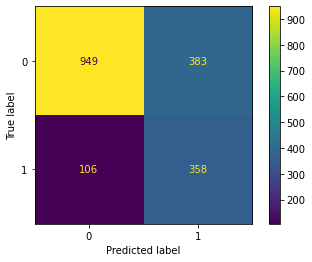

In [83]:
from sklearn.metrics import plot_confusion_matrix

#ComplementNB
plot_confusion_matrix(ComplementNB().fit(x_train, y_train), x_valid, y_valid)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 464 человек, из них алгоритмом 358 определены верно и 106 неверно.

**Матрица ошибок для XGBClassifier:**

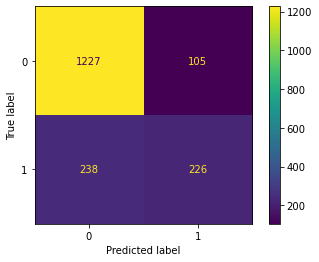

In [85]:
# XGBClassifier

plot_confusion_matrix(xgbc_GS_model, x_valid, y_valid)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 464 человек, из них алгоритмом 226 определены верно и 238 неверно.

**Матрица ошибок для RandomForestClassifier:**

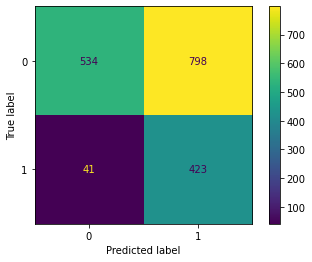

In [98]:
# RandomForestClassifier

plot_confusion_matrix(predictions[1][0], x_valid, y_valid)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 464 человек, из них алгоритмом 423 определены верно и 41 неверно.

## Вывод:

Мы проработали несколько алгоритмов обучения. Какие-то справились лучше, какие-то хуже. Однако именно *RandomForestClassifier* имеет высокие показатели метрики *recall*, так важной нам. Поэтому считаем, что этот алгоритм подходит лучше остальных для решения задачи оттока клиентов рассматриваемой компании.